 Това ще бъде моята документация за проекта Strava. Каква е идея и главни take away points?
 1. Свали всички данни
 2. Разпредели галвни метрики -> дистанция, средна скорост и датите на които съм тичал
 3. направи няколко графики. Една за 5км как се справяш през 2023 и после за 2024. Втора по колко км тичаш на месец за 2023 и 2024
 4. Добави imports -> numpy, pandas, matplotlib
 

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [231]:
df = pd.read_excel("filtered_runs.xlsx")
print(df)

               Activity Date Activity Type  Elapsed Time  Moving Time  \
0    Jan 29 2023 12:30:39 PM           Run          3662         3583   
1     Jan 30 2023 8:01:49 PM           Run           759          756   
2     Jan 31 2023 8:17:41 PM           Run           715          715   
3      Feb 4 2023 8:06:09 AM           Run          2602         2583   
4      Feb 7 2023 6:19:18 PM           Run           748          748   
..                       ...           ...           ...          ...   
266    May 7 2025 3:53:23 PM           Run          1844         1209   
267   May 13 2025 4:51:39 PM           Run          3650         1446   
268   May 14 2025 6:20:05 PM           Run          2702         2851   
269   May 17 2025 5:54:31 PM           Run          5288         5964   
270  May 23 2025 10:51:58 AM           Run          2988         3937   

     Distance  Average Speed  Max Speed  Elevation Gain  Elevation Loss  \
0        9.07       6.579290   5.152002       68

In [232]:
def distance(np_array, start_row, end_row):
    np_array = np_array.iloc[start_row:end_row, 4:5]
    data_distance = np.array(np_array)
    return [float(i[0]) for i in data_distance]

def av_speed(np_array, start_row, end_row):
    np_array = np_array.iloc[start_row:end_row, 5:6]
    data_speed = np.array(np_array)
    return [float(f'{i[0]:.2f}') for i in data_speed]


def extract_date(np_array, start_row, end_row):
    np_array = np_array.iloc[start_row:end_row, :1]
    data_dates = np.array(np_array)
    date_list = [date_str for row in data_dates for date_str in row]
    dates = [datetime.strptime(d, '%b %d %Y %I:%M:%S %p') for d in date_list]
    return dates

# Data for 2023

In [233]:
distance_2023 = distance(df, 0, 77)
av_speed_2023 = av_speed(df, 0, 77)
dates_2023 = extract_date(df, 0, 77)

## Graphs

(9.07, 2.33, 2.3, 6.83, 2.29, 10.62, 1.83, 3.01, 11.28, 2.21, 2.27, 2.75, 10.17, 2.27, 1.43, 5.24, 1.3, 9.34, 6.84, 8.0, 8.0, 8.0, 21.0, 5.0, 0.45, 0.23, 5.0, 5.09, 0.1, 0.11, 0.07, 2.31, 1.0, 5.24, 1.51, 5.0, 10.01, 15.0, 20.0, 5.08, 42.83, 2.44, 10.69, 1.76, 5.44, 5.21, 4.42, 5.12, 3.53, 2.0, 2.0, 5.11, 1.37, 6.0, 2.26, 1.0, 0.51, 2.0, 2.01, 2.0, 5.12, 5.0, 1.0, 2.0, 5.0, 5.0, 4.98, 2.57, 2.1, 2.38, 2.24, 2.02, 2.0, 1.2, 1.04, 0.32, 0.11)


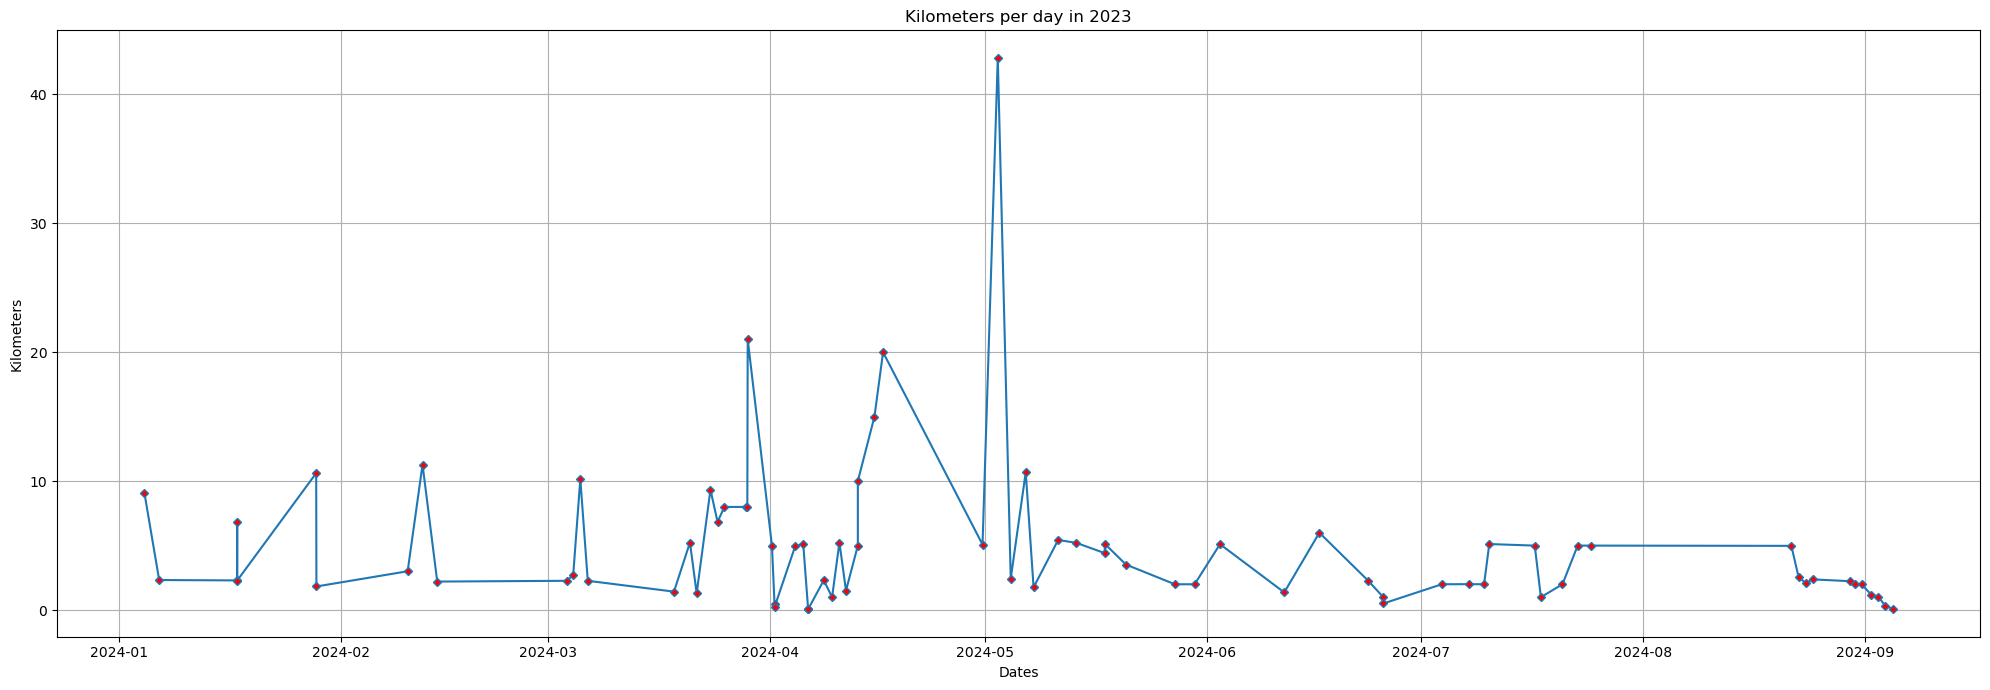

In [239]:
dates_2023, distance_2023 = zip(*sorted(zip(dates_2023, distance_2023)))
print(distance_2023)

plt.figure(figsize=(20, 7))
plt.plot(dates_2023, distance_2023, marker='D', markerfacecolor='r', markersize=4)
plt.xlabel('Dates')
plt.ylabel('Kilometers')
plt.title('Kilometers per day in 2023')
plt.tight_layout()
plt.grid(True)
plt.show()

### Average speed for 5km

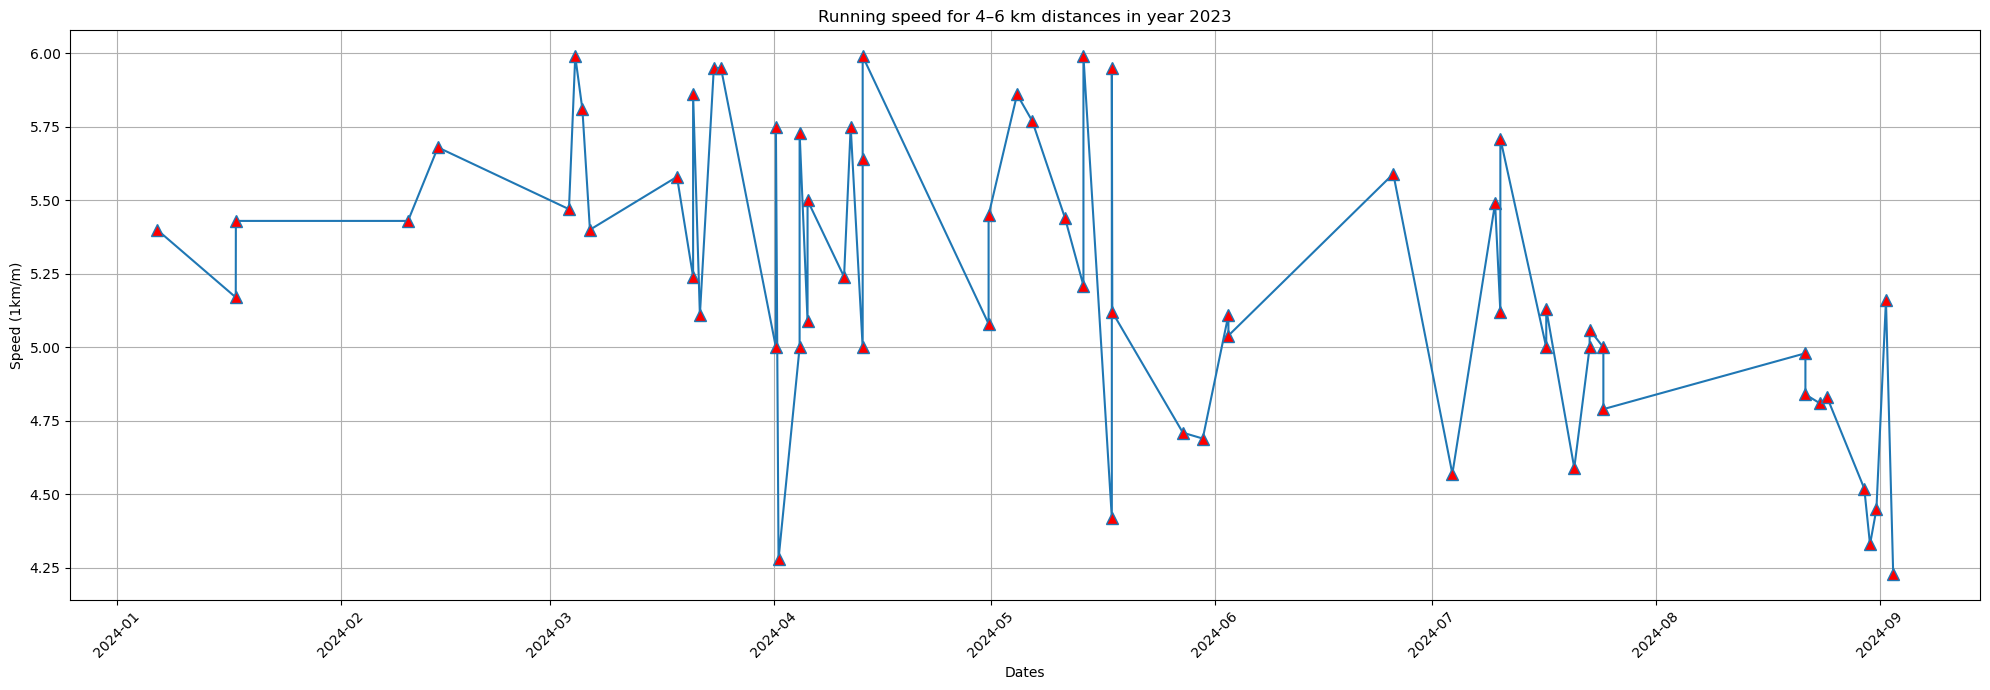

In [243]:
dates_2023, distance_2023 = zip(*sorted(zip(dates_2023, distance_2023)))
dates_2023, av_speed_2023 = zip(*sorted(zip(dates_2023, av_speed_2023)))
distanc_speed = list(zip(distance_2023, av_speed_2023))
combined_data = {}
for key, value in zip(dates_2023, distanc_speed):
    combined_data[key] = value
dates_km5 =[]
speed_km5 = []
for key, value in combined_data.items():
    for i in value:
        if 4 < i <6:
            dates_km5.append(key)
            speed_km5.append(i)

plt.figure(figsize=(20, 7))
plt.plot(dates_km5 , speed_km5 , marker = '^', markerfacecolor = 'r', markersize = 8)
plt.xlabel('Dates')
plt.ylabel('Speed (1km/m)')
plt.title('Running speed for 4–6 km distances in year 2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2024

## Data

In [236]:
distance_2024 = distance(df, 77, 230)
av_speed_2024 = av_speed(df, 77, 230)
dates_2024 = extract_date(df, 77, 230)


## Graphs

### Kilometers ran by mounth

(5.0, 5.0, 2.1, 5.07, 5.01, 6.28, 1.83, 1.69, 9.0, 5.0, 5.0, 0.01, 1.0, 1.08, 3.31, 7.13, 1.36, 5.0, 5.01, 2.5, 2.05, 4.33, 1.0, 5.41, 5.0, 2.61, 5.0, 5.0, 2.33, 5.01, 0.25, 5.01, 5.0, 5.0, 5.0, 5.14, 4.97, 5.01, 3.6, 2.0, 3.5, 2.51, 4.5, 2.5, 5.0, 5.01, 2.67, 2.34, 4.03, 3.5, 5.58, 1.0, 1.24, 4.21, 2.45, 2.33, 1.24, 3.01, 5.61, 5.01, 0.5, 1.02, 6.2, 5.0, 0.59, 3.69, 2.4, 2.23, 2.4, 2.24, 0.77, 0.92, 1.1, 1.29, 1.47, 1.65, 1.69, 1.72, 2.07, 2.0, 2.21, 2.4, 0.63, 0.6, 2.38, 2.22, 2.48, 2.5, 5.11, 2.29, 3.24, 2.02, 2.01, 5.18, 1.32, 1.05, 0.81, 1.25, 0.65, 1.33, 5.01, 1.01, 7.72, 1.23, 5.04, 5.14, 5.06, 4.03, 4.45, 5.17, 8.01, 5.0, 2.02, 5.86, 4.99, 1.23, 1.03, 1.81, 1.38, 2.14, 6.0, 1.61, 5.09, 4.97, 5.13, 1.62, 4.06, 2.29, 0.12, 0.53, 0.18, 0.45, 7.01, 5.11, 1.0, 4.1, 8.19, 5.79, 2.2, 5.49, 5.05, 5.35, 5.0, 5.08, 11.19, 5.12, 2.79, 3.07, 1.06, 6.06, 3.27, 3.31, 7.92)


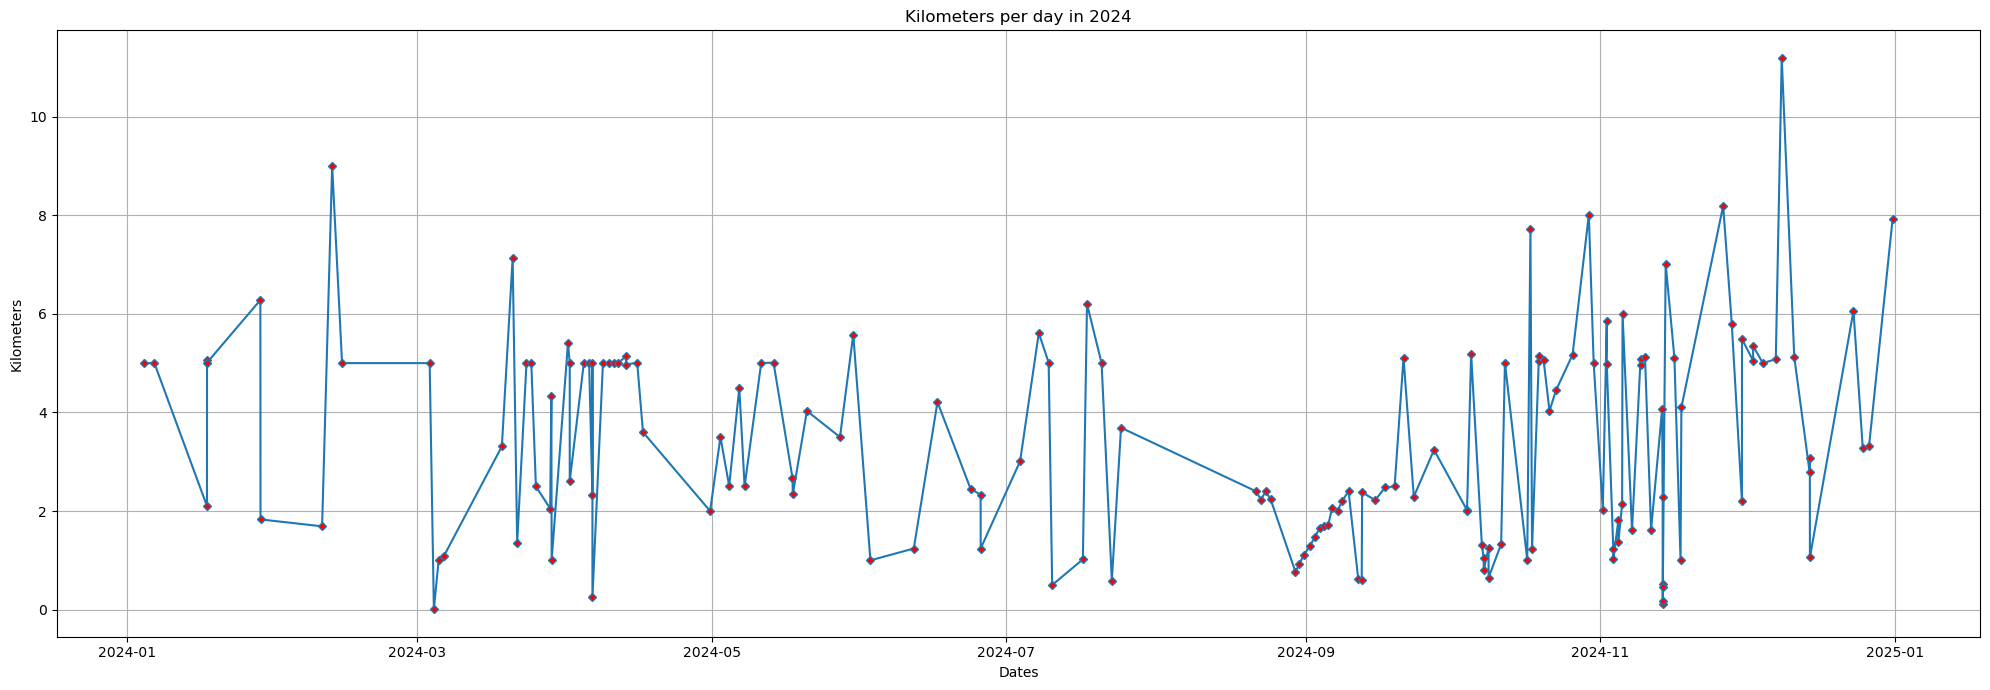

In [240]:
dates_2024, distance_2024 = zip(*sorted(zip(dates_2024, distance_2024)))
print(distance_2024)

plt.figure(figsize=(20, 7))
plt.plot(dates_2024, distance_2024, marker='D', markerfacecolor='r', markersize=4)
plt.xlabel('Dates')
plt.ylabel('Kilometers')
plt.title('Kilometers per day in 2024')
plt.tight_layout()
plt.grid(True)
plt.show()

### Average speed for 5km

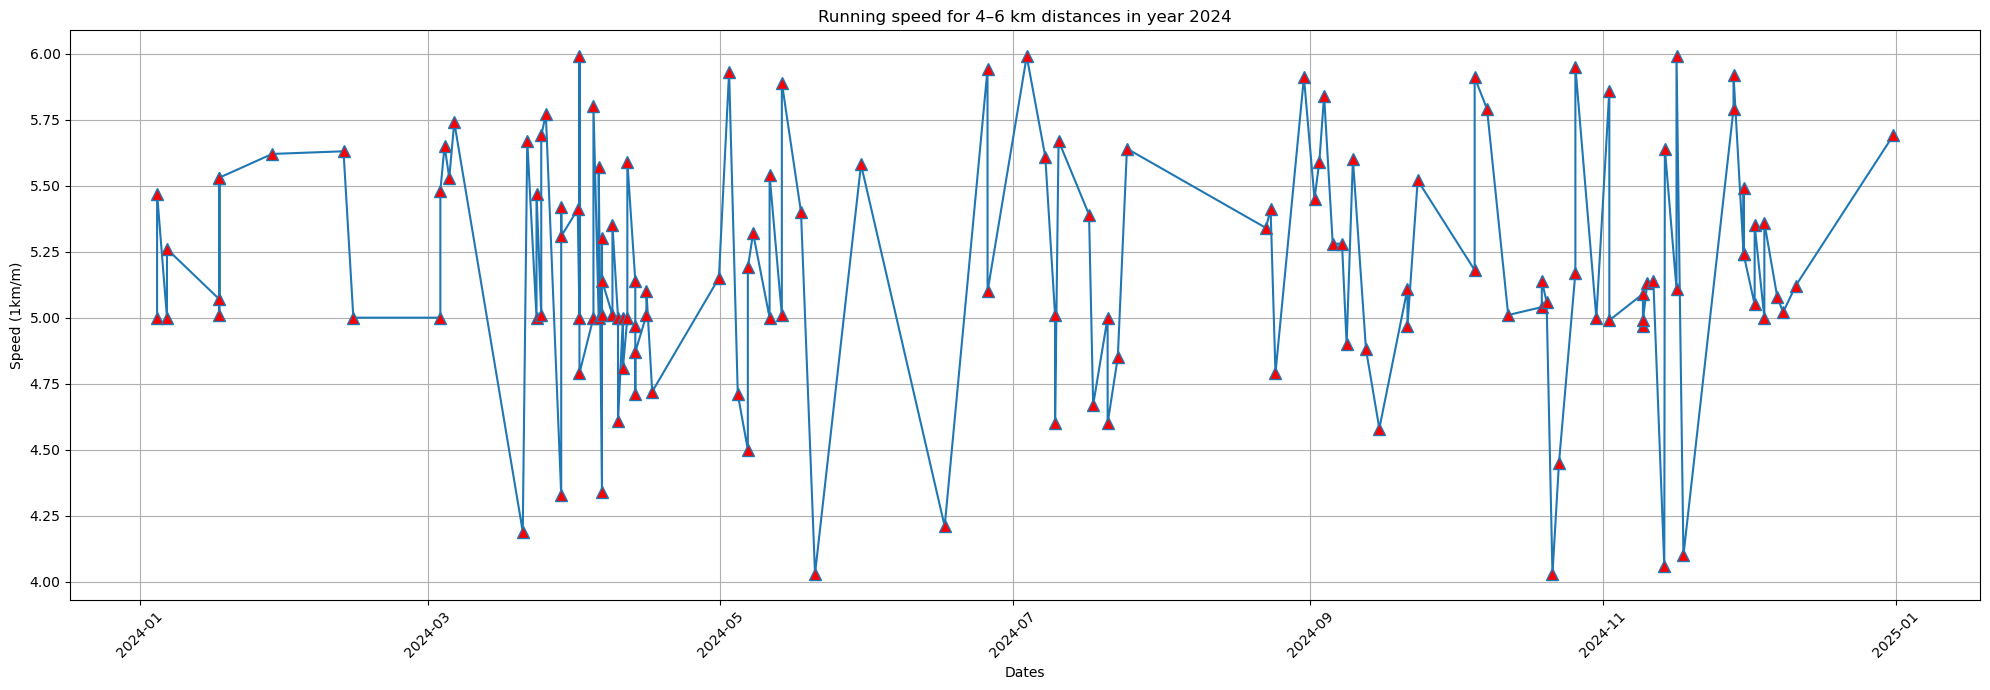

In [244]:
dates_2024, distance_2024 = zip(*sorted(zip(dates_2024, distance_2024)))
dates_2023, av_speed_2024 = zip(*sorted(zip(dates_2024, av_speed_2024)))
distanc_speed = list(zip(distance_2024, av_speed_2024))
combined_data = {}
for key, value in zip(dates_2023, distanc_speed):
    combined_data[key] = value
dates_km5 =[]
speed_km5 = []
for key, value in combined_data.items():
    for i in value:
        if 4 < i <6:
            dates_km5.append(key)
            speed_km5.append(i)

plt.figure(figsize=(20, 7))
plt.plot(dates_km5 , speed_km5 , marker = '^', markerfacecolor = 'r', markersize = 8)
plt.xlabel('Dates')
plt.ylabel('Speed (1km/m)')
plt.title('Running speed for 4–6 km distances in year 2024')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()